# Project: Investigate a Dataset showing whether patients in Brazil show up for their medical appointments or not.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset collects information from 100k medical appointments in Brazil.We will mainly focus on whether these patients show up for their scheduled appointments or not. 

Some of the questions we will be answering using this dataset include;
<ol>
    <li>Does neighbourhood affect patients showing up to appointments or not?</li>
    <li>Which age has the most patients showing/not showing for appointments?</li>
    <li>Does SMS_received affect patients showing up/not for their appointment?</li>
    <li>Which gender shows up for most of their appointments?</li>
    <li>When do patients schedule appointments?</li>
</ol>

In [2]:
#import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling & cleaning'></a>
## Data Wrangling and Cleaning

In [3]:
#load data
df_brazil = pd.read_csv('KaggleV2-May-2016.csv')

In [4]:
#inspect data
df_brazil.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset contains:
<ul>
    <li>patientId</li>
    <li>AppointmentId</li>
    <li>gender</li>
    <li>ScheduledDay: The day the patient set up the appointment</li>
    <li>AppointmentDay</li>
    <li>Age</li>
    <li>Neighbourhood: Location of hospital</li>
    <li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família</a>.</li>
    <li>Hipertension</li>
    <li>Diabetes</li>
    <li>Alcoholism</li>
    <li>Handcap</li>
    <li>SMS_received</li>
    <li>No-show: The values in the column labeled <b>No</b>:if patient showed up to appointment and <b>Yes</b>:If patient didn't show </li>
</ul>

The patientId & AppointmentId aren't necessarily important for the analysis so will exclude them from the dataset.
I also need to rename Neigbourhood so that it can be easily understood

In [5]:
df_brazil.shape

(110527, 14)

The dataset contains 110,527 rows and 14 columns

In [6]:
df_brazil.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Average number of patients that have set up an appointment are about 37 years old and most are between 18-55yrs bracket, with the oldest being 115 yrs and only apporximately 32% have received an SMS. Most of the patients setting up appointmnets are handcap.

From the dataset i need to dig deeper into the age column.

In [7]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df_brazil.duplicated().sum()
df_brazil.drop_duplicates(inplace=True)
print(df_brazil.duplicated().sum())

0


There are 635 duplicated rows. Need to drop the rows 

None of the columns contain any null values and i need to change the data types for <b>ScheduledDay</b> and <b>AppointmentDay<b> and change the values in <b>hospital_location</b> to lower

### Data Cleaning 
In this section i will clean up the data as mentioned in some of the notes above. Drop unwanted columns, rename columns, and make the data look more uniform across

In [9]:
#Dropping columns that i don't need for the analysis
df_brazil.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
#Renaming Neighbourhood column to hospital_location so that it can be easily understood
df_brazil.rename(columns = {'Neighbourhood':'Hospital_location'}, inplace=True)
#Make columns uniform with underscores and lower case for all
df_brazil.rename(columns = lambda x: x.strip().lower().replace("-","_"), inplace=True)
#change all values within hospital_location and no_show to lower case 
df_brazil['hospital_location'] = df_brazil['hospital_location'].str.lower()
df_brazil['no_show'] = df_brazil['no_show'].str.lower()
df_brazil.head()

,gender,scheduledday,appointmentday,age,hospital_location,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,jardim da penha,0,1,0,0,0,0,no
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,jardim da penha,0,0,0,0,0,0,no
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,mata da praia,0,0,0,0,0,0,no
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,pontal de camburi,0,0,0,0,0,0,no
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,jardim da penha,0,1,1,0,0,0,no


In [10]:
#changing datatypes for appointment & scheduledDay
df_brazil['scheduledday'] = pd.to_datetime(df_brazil['scheduledday'],format='%Y-%m-%d')
df_brazil['appointmentday'] = pd.to_datetime(df_brazil['appointmentday'],format='%Y-%m-%d')

In [11]:
#Rechecking data types to check if changes have been effected.
df_brazil.dtypes

gender                            object
scheduledday         datetime64[ns, UTC]
appointmentday       datetime64[ns, UTC]
age                                int64
hospital_location                 object
scholarship                        int64
hipertension                       int64
diabetes                           int64
alcoholism                         int64
handcap                            int64
sms_received                       int64
no_show                           object
dtype: object

In [12]:
#Investigating age further since we have age min = -1 & max = 115
df_brazil[df_brazil['age']<0].shape[0]
#df[df["Age"] < 0].shape[0]

1

Only 1 value below 0 yrs. Need to drop the row.

In [13]:
df_brazil[df_brazil['age']>100].shape[0]

7

There are 7 patients above the age of 100, look into them further to see if there's need to keep them in dataset

In [14]:
df_brazil[df_brazil.age>100]

,gender,scheduledday,appointmentday,age,hospital_location,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,conquista,0,0,0,0,0,0,no
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,andorinhas,0,0,0,0,1,0,yes
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,andorinhas,0,0,0,0,1,0,yes
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,andorinhas,0,0,0,0,1,0,yes
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,andorinhas,0,0,0,0,1,0,no
90372,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,maria ortiz,0,0,0,0,0,0,no
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,são josé,0,1,0,0,0,1,no


Stats are interesting for patients above 100 years. Most are female and 4 of them have actually showed up for appointments with only 3 not showing up. Will keep these values in the data set.

In [15]:
#dropping row having below 0 yrs
df_brazil.drop(df_brazil[df_brazil['age'] < 0].index, inplace=True)

In [16]:
#Rechecking age
df_brazil[df_brazil['age']<0].shape[0]

0

The data is clean enough for exploration.

In [17]:
df_brazil.head()

,gender,scheduledday,appointmentday,age,hospital_location,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,jardim da penha,0,1,0,0,0,0,no
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,0,0,0,0,0,no
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,mata da praia,0,0,0,0,0,0,no
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,pontal de camburi,0,0,0,0,0,0,no
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,1,1,0,0,0,no


<a id='eda'></a>
## Exploratory Data Analysis
In this section, we will answer some of the questions we asked at the beginning.
### Research Question 1: Does neighbourhood affect patients showing up or not?

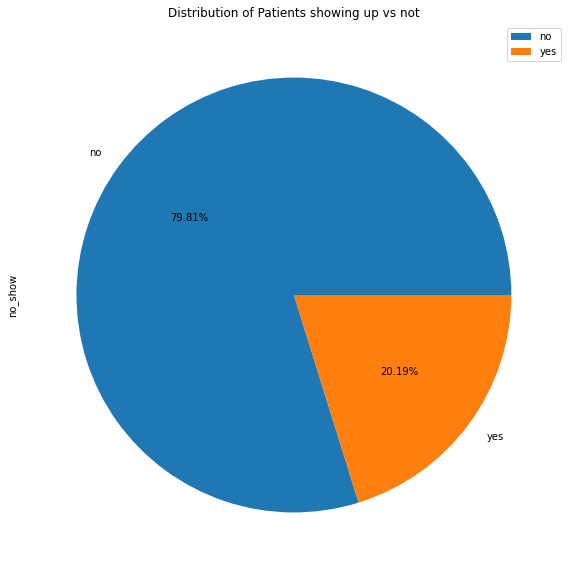

In [18]:
#see the distribution of No - No_show Vs Yes - No_show using a pie-chart
df_brazil['no_show'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct='%.2f%%', 
                                         title = 'Distribution of Patients showing up vs not',
                                        legend = ('no_show'));

The pie-chart above shows overall only 20.19% of the patients didn't show up for their appointments. Let's look further and explore which hospital had the most appointments

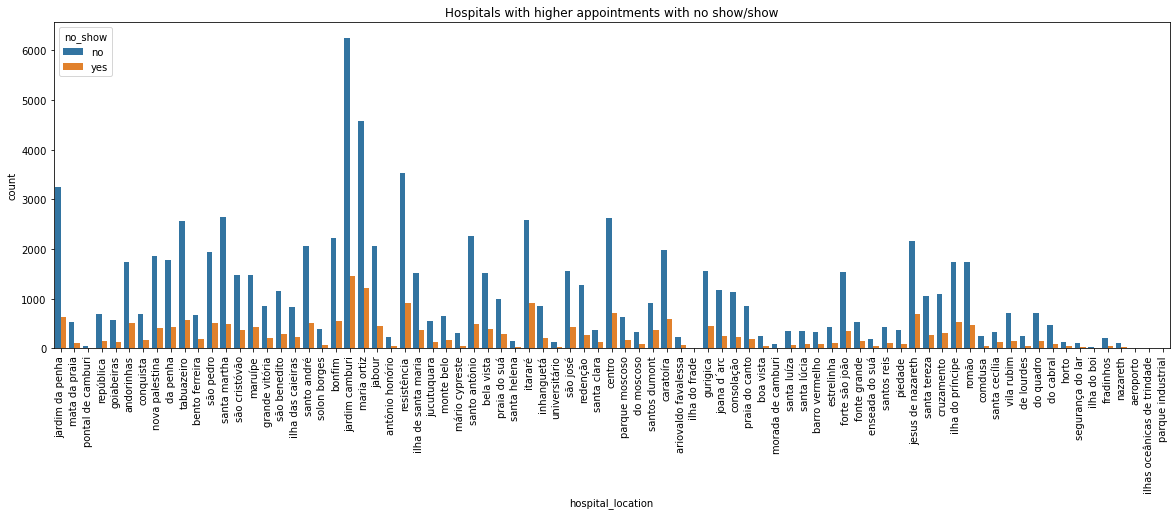

In [19]:
#hospitals with most appointments
plt.figure(figsize=(20,6))
plt.title('Hospitals with higher appointments with no show/show')
plt.xticks(rotation=90)
sns.countplot(x=df_brazil['hospital_location'], data=df_brazil, hue='no_show');

From the bar chart we can see that the highest number of appointments are made at <b><i>jardim camburi</i></b> while hospitals like <b>aeroporto,ilhas oceanicas de trindade & parque industrial</b> didn't have any appointments at all. 
Perharps the hospital location has something to do with number of appointments or not.

### Research Question 2: Which age has the most patients showing/not showing for appointments?

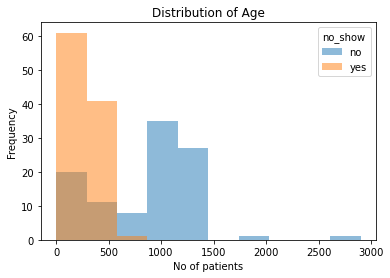

In [20]:
#Age distribution amongst patients
pd.crosstab(df_brazil['age'],df_brazil['no_show']).plot(kind='hist', alpha = 0.5);
plt.title('Distribution of Age');
plt.xlabel('No of patients');

Most patients that show up for their appointments are averagly aged 38 years old

### Research Question 3: Does SMS_received affect patients showing up or not for appointments?

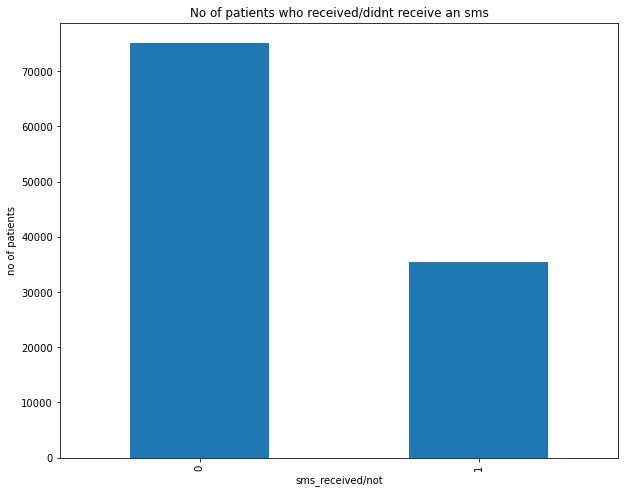

In [21]:
#how many patients received an sms
txt = "0 - Didn't receieve an sms, 1 - Received an sms"
df_brazil['sms_received'].value_counts().plot(kind = 'bar',figsize = (10,8),
                                              title = 'No of patients who received/didnt receive an sms',
                                             xlabel = 'sms_received/not',
                                             ylabel = 'no of patients');

<b><i>0 - Didn't receive an sms</i></b><br>
<b><i>1 - Received an sms</i></b>

From the bar chart above, we see that over 30,000 patients received an sms. Does this actually affect whether they show up or not for appointment? We can't really tell

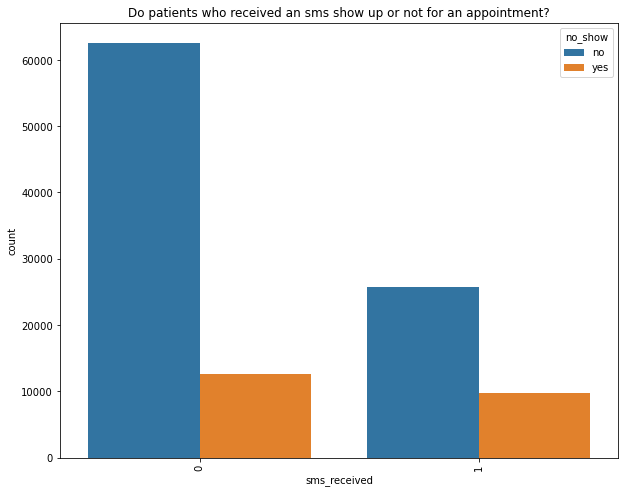

In [22]:
#Does patients receiving an sms actually affect whether they show up or not for an appointment?
plt.figure(figsize=(10,8))
plt.title('Do patients who received an sms show up or not for an appointment?')
plt.xticks(rotation=90)
sns.countplot(x=df_brazil['sms_received'], data=df_brazil, hue='no_show'); 

The highest number of patients that showed up for an appointment didn't receive an sms so we can conclude that sms doesn't affect the number of patients who show up to an appointment or not. 

### Research Question 4: Which gender shows up most for their appointments?

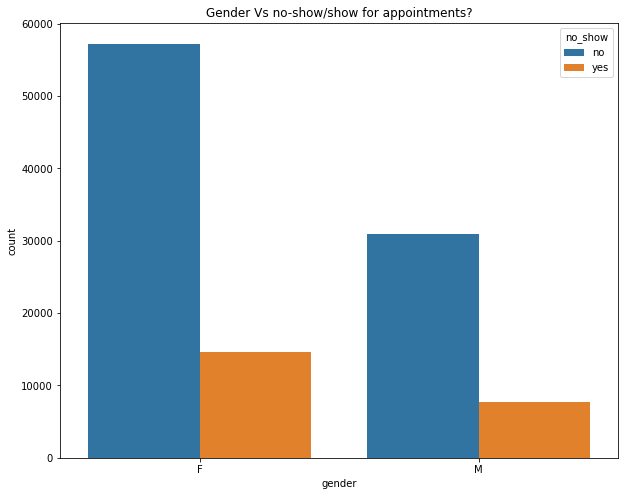

In [23]:
plt.figure(figsize=(10,8))
plt.title('Gender Vs no-show/show for appointments?')
#plt.xticks(rotation=90)
sns.countplot(x=df_brazil['gender'], data=df_brazil, hue='no_show'); 

More females show up for appointments compared to males 

### Research Question 5: When do patients schedule appointments?

In [24]:
#Extracing dateparts from ScheduledDay to understand what times/days patients schedule appointments
df_brazil['scheduledday_year'] = df_brazil.scheduledday.dt.year
df_brazil['scheduledday_month']= df_brazil.scheduledday.dt.month
df_brazil['scheduledday_day']= df_brazil.scheduledday.dt.day
df_brazil['scheduledday_hour']= df_brazil.scheduledday.dt.hour

In [25]:
df_brazil.head()

,gender,scheduledday,appointmentday,age,hospital_location,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_year,scheduledday_month,scheduledday_day,scheduledday_hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,jardim da penha,0,1,0,0,0,0,no,2016,4,29,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,0,0,0,0,0,no,2016,4,29,16
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,mata da praia,0,0,0,0,0,0,no,2016,4,29,16
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,pontal de camburi,0,0,0,0,0,0,no,2016,4,29,17
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,1,1,0,0,0,no,2016,4,29,16


In [26]:
df_brazil.scheduledday_year.value_counts()

2016    110464
2015        62
Name: scheduledday_year, dtype: int64

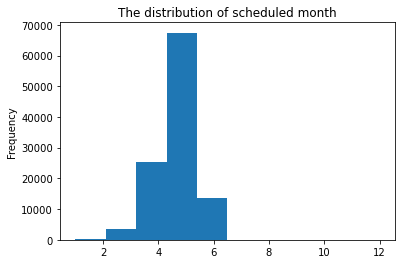

In [27]:
df_brazil.scheduledday_month.plot(kind='hist',title= 'The distribution of scheduled month');

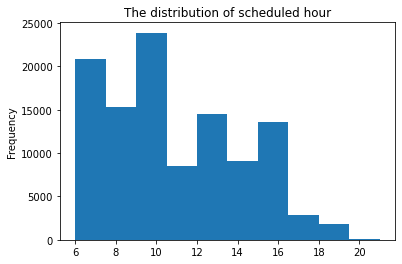

In [28]:
df_brazil.scheduledday_hour.plot(kind='hist',title= 'The distribution of scheduled hour');

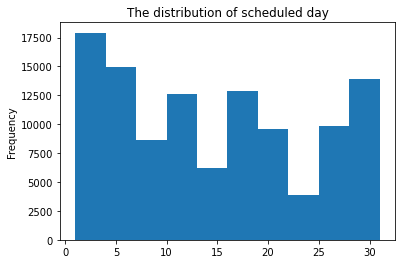

In [29]:
df_brazil.scheduledday_day.plot(kind='hist',title= 'The distribution of scheduled day');

<ul>
    <li>2016 had the highest number of appoitments made</li>
    <li>Most of the patients schedule appointments between April & June with the highest number scheduling in May</li>
    <li>According to the chart, the days are split out across, there's really no preferred day to place an appointment</li>
    <li><b>The distribution of scheduled hour</b> is skewed to the right meaning most appointments are made in the morning hours</li>
</ul>


<a id='conclusions'></a>
## Conclusions

In conclusion, 
<ol>
    <li>Most patients prefer <b><i>jardim camburi</i></b> location</li>
    <li>Most are middle aged as seen in the findings</li>
    <li>SMS doesn't determine whether a patient shows up or not for their appointment</li>
    <li>Females are the ones that show up most for their appointments</li>
    <li>Most appointments are scheduled in 2016, with the highest month being May and most appoitments made in the morning hours</li>
</ol>

Some of the limitations with the exploration include;
<ul>
    <li>This is just a small sample of data, a different sample might produce different findings so this can;t be conculsive </li>
    <li>The data wasn't so messy however naming of columns and the way the data is entered is very hard to understand especially if one didn't collect the data and is only doing the analysis</li>
</ul>